# delayed-delayed

### 1、与李老师生成的 ROOT 文件做交叉验证

In [1]:
TFile *ipfMe = new TFile("ROOT/Gdd_100_109.root");
TTree *treeMe = (TTree*)ipfMe->Get("tree");
TFile *ipfLi = new TFile("ROOT/dd100_109.root");
TTree *treeLi = (TTree*)ipfLi->Get("tree");
TCanvas* c1 = new TCanvas;

In [2]:
treeMe->Draw("ex>>pjeMe(1500,0,1500)","nd==2");
TH1D *pjeMe = (TH1D*)gROOT->FindObject("pjeMe");
pjeMe->SetLineColor(kBlue);

treeLi->Draw("dx>>pjeLi(1500,0,1500)");
TH1D *pjeLi = (TH1D*)gROOT->FindObject("pjeLi");
pjeLi->SetLineColor(kRed);

#### 二者投影谱形基本相同，但统计不同；统计差异来源于对多重性不同的限制方法

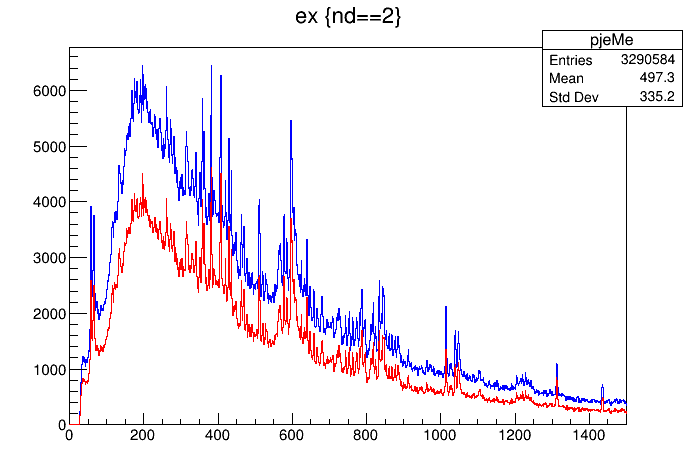

In [3]:
pjeMe->Draw();
pjeLi->Draw("same");
c1->Draw();

### 2、生成矩阵，检查本底

In [4]:
//gROOT->ProcessLine(".x gmatrix.cpp");

In [5]:
TFile* fmat = new TFile("ROOT/Gddmat.root");
TH2D* hxy = (TH2D*)fmat->Get("hg2xy");
TH2D* hxyp = (TH2D*)fmat->Get("hg2xyp");
TH1D* hx = (TH1D*)fmat->Get("hg2x");
TH1D* hxb = (TH1D*)fmat->Get("hg2xb");
TH1D* hxp = (TH1D*)fmat->Get("hg2xp");

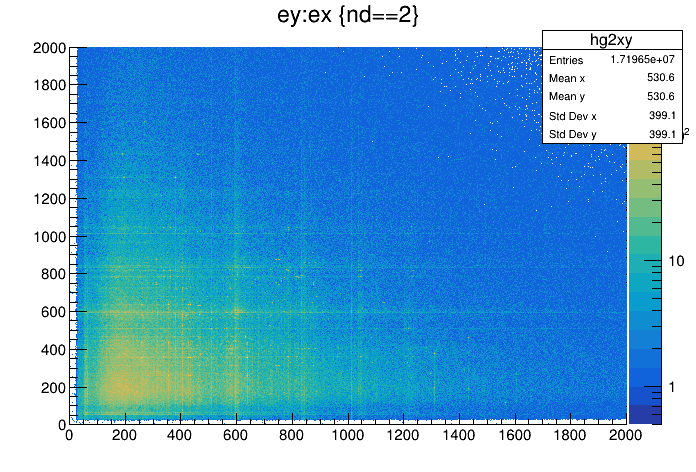

In [6]:
hxy->Draw("colz");
c1->SetLogz();
c1->Draw();

如何判断本底拟合的参数取值？

In [7]:
%jsroot on

In [8]:
hx->Draw();
hxb->Draw("same");
hxp->Draw("same");
c1->Draw();

### 3、开窗

#### 总投影谱

In [9]:
gROOT->ProcessLine(".x gg.C");

load ROOT file: ROOT/Gddmat.root


是否可以开不对称的窗？

In [10]:
newcanvas();
setpeakwidth(-2,3);
setnpeaks(10);
g(818.6);

投影谱上 153keV 不干净，且峰中心在 \[152,153)；开窗效果相对几个主要的 delayed gamma 较差，有许多其他峰混入（不过比 prompt 好多了）；1235 keV 峰形奇怪，可能是扣本底时破坏了峰形

In [11]:
newcanvas();
setpeakwidth(-2,2);
setnpeaks(30);
g(153.6);

1235 keV 开窗能看到 153 keV

In [12]:
newcanvas();
setpeakwidth(-2,3);
setnpeaks(10);
g(1235.2);

273 keV 开窗谱中，363 keV 峰形不太正常，可能是扣本底破坏峰形；开窗效果与 153 keV 类似

In [13]:
newcanvas();
setpeakwidth(-3,3);
setnpeaks(30);
g(273.9);